Question 6: Assume linear model and add 0-mean Guassian noise to generate 100 samples and user fit the model along with data

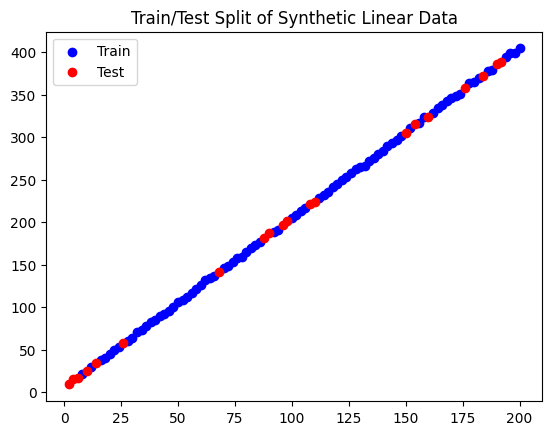

Mean Squared Error on Test Data: 1.0311


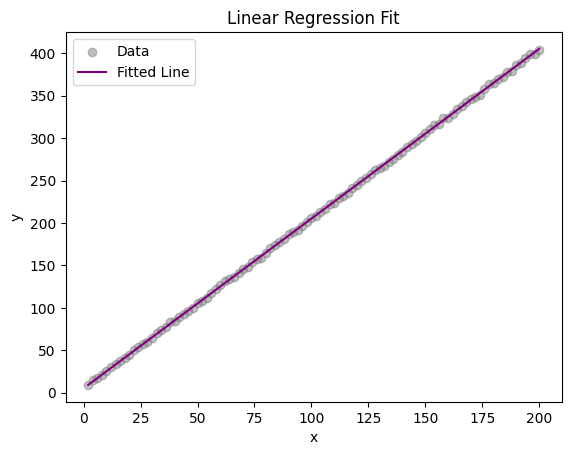

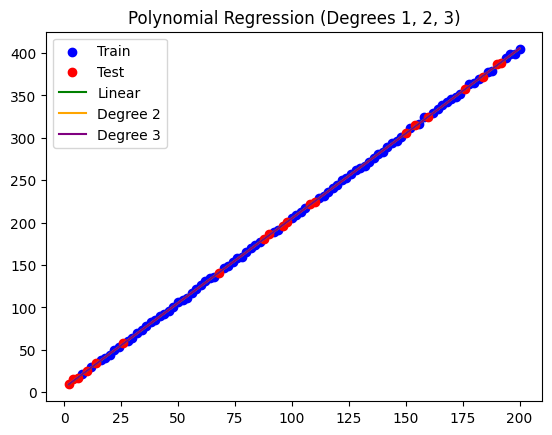

MSE - Linear: 1.0311085816425933
MSE - Degree 2: 0.9832405595230229
MSE - Degree 3: 0.9990998733178718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(18) # set seed for reproducibility such that it generates same random number at every execution

x=np.linspace(2,200,100).reshape(-1,1) # generates 100 input vales x (sample input) between 2 and 200

# define a true linear relationship between sample input x and output/target y (e.g y=2x+5) and add random noise
true_slope=2
true_intercept=5
noise=np.random.normal(0,1,size=(100,1)) # generates random gaussian noise with mean=0 , std=1

y=true_slope*x+true_intercept+noise

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18) # split into training and testing sets (80:20)

plt.scatter(x_train,y_train,color='blue',label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.title("Train/Test Split of Synthetic Linear Data")
plt.legend()
plt.show()

model=LinearRegression() # Initialize the Linear Regression model
model.fit(x_train,y_train) # Train the model using the training data
y_predicted=model.predict(x_test) # Predict the output on test data

mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

# Plot the fitted model along with the original data
plt.scatter(x, y, color='gray', label='Data', alpha=0.5)  # All data points
plt.plot(x, model.predict(x), color='purple', label='Fitted Line')  # Fitted regression line
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Degree 2 Polynomial
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

model_poly2 = LinearRegression()
model_poly2.fit(x_train_poly2, y_train)
y_pred_poly2 = model_poly2.predict(x_test_poly2)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)

# Degree 3 Polynomial
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

model_poly3 = LinearRegression()
model_poly3.fit(x_train_poly3, y_train)
y_pred_poly3 = model_poly3.predict(x_test_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)

# Plotting all models
x_plot = np.linspace(2, 200, 100).reshape(-1,1)
y_lin_pred = model.predict(x_plot)
y_poly2_pred = model_poly2.predict(poly2.transform(x_plot))
y_poly3_pred = model_poly3.predict(poly3.transform(x_plot))

plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.plot(x_plot, y_lin_pred, color='green', label='Linear')
plt.plot(x_plot, y_poly2_pred, color='orange', label='Degree 2')
plt.plot(x_plot, y_poly3_pred, color='purple', label='Degree 3')
plt.title('Polynomial Regression (Degrees 1, 2, 3)')
plt.legend()
plt.show()

# Print MSEs
print("MSE - Linear:", mean_squared_error(y_test, model.predict(x_test)))
print("MSE - Degree 2:", mse_poly2)
print("MSE - Degree 3:", mse_poly3)


Ques 7

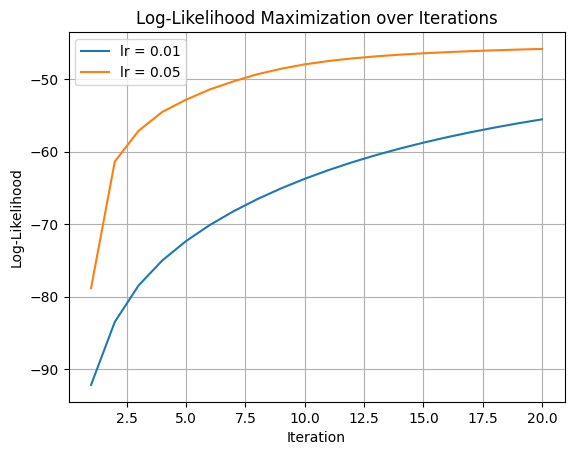

Final Weights using Log-Likelihood Maximization (lr=0.05):
[-1.88288449 -0.53588425  3.54091168 -3.46430747]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/A2_P2.csv.csv')

# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def compute_log_likelihood(X, y, weights):
    h = sigmoid(X @ weights)
    epsilon = 1e-9  # to avoid log(0)
    return np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

# Gradient ascent to maximize log-likelihood
def gradient_ascent(X, y, lr, iterations):
    m, n = X.shape
    weights = np.zeros((n, 1))
    log_likelihood_history = []

    for _ in range(iterations):
        h = sigmoid(X @ weights)
        gradient = X.T @ (y - h)
        weights += lr * gradient  # ascent step
        log_likelihood = compute_log_likelihood(X, y, weights)
        log_likelihood_history.append(log_likelihood)

    return weights, log_likelihood_history

# Run for learning rates 0.01 and 0.05
learning_rates = [0.01, 0.05]
iterations = 20

for lr in learning_rates:
    _, ll_history = gradient_ascent(X_train, y_train, lr=lr, iterations=iterations)
    plt.plot(range(1, iterations + 1), ll_history, label=f'lr = {lr}')

plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Maximization over Iterations")
plt.legend()
plt.grid(True)
plt.show()


weights, ll_history = gradient_ascent(X_train, y_train, lr=lr, iterations=iterations)
print(f"Final Weights using Log-Likelihood Maximization (lr={lr}):\n{weights.ravel()}\n")


Ques 7


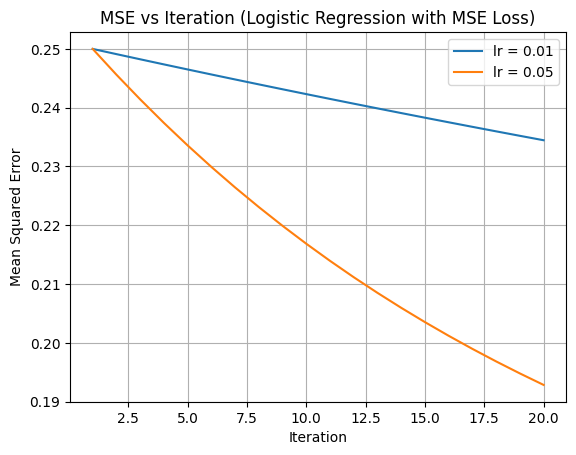

Final Weights using MSE Minimization (lr=0.05):
[-0.4162453  -0.07276904  0.1940284  -0.15435023]



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/A2_P2.csv.csv')

# Separate features and label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Mean Squared Error
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Gradient descent with MSE
def gradient_descent_mse(X, y, lr, iterations):
    m, n = X.shape
    weights = np.zeros((n, 1))
    mse_history = []

    for i in range(iterations):
        h = sigmoid(X @ weights)
        error = h - y
        gradient = (2/m) * X.T @ error
        weights -= lr * gradient
        mse = compute_mse(y, h)
        mse_history.append(mse)

    return weights, mse_history

# Learning rates to test
learning_rates = [0.01, 0.05]
iterations = 20

# Run gradient descent and plot MSE
for lr in learning_rates:
    _, mse_history = gradient_descent_mse(X_train, y_train, lr=lr, iterations=iterations)
    plt.plot(range(1, iterations + 1), mse_history, label=f'lr = {lr}')

plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iteration (Logistic Regression with MSE Loss)")
plt.legend()
plt.grid(True)
plt.show()

weights, mse_history = gradient_descent_mse(X_train, y_train, lr=lr, iterations=iterations)
print(f"Final Weights using MSE Minimization (lr={lr}):\n{weights.ravel()}\n")

Ques 8

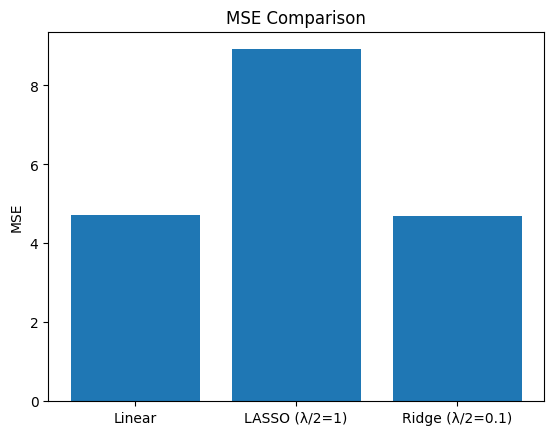

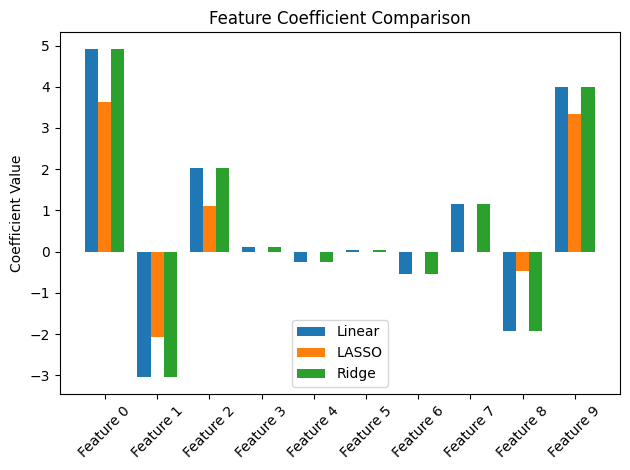

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("/content/A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear": LinearRegression(),
    "LASSO (λ/2=1)": Lasso(alpha=1),
    "Ridge (λ/2=0.1)": Ridge(alpha=0.1)
}

mse_values = {}
weights = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values[name] = mse
    weights[name] = model.coef_

# Plotting MSE
plt.bar(mse_values.keys(), mse_values.values())
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.show()

# Plotting Coefficients
labels = [f"Feature {i}" for i in range(X.shape[1])]
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, weights["Linear"], width, label='Linear')
plt.bar(x, weights["LASSO (λ/2=1)"], width, label='LASSO')
plt.bar(x + width, weights["Ridge (λ/2=0.1)"], width, label='Ridge')

plt.ylabel("Coefficient Value")
plt.title("Feature Coefficient Comparison")
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
